# **TRABALHO - Radix-2 - Cooley–Tukey FFT**

O método mais simples e talvez mais conhecido para calcular a FFT é o algoritmo Radix-2 Decimation in Time. O Radix-2 FFT funciona decompondo um sinal de domínio de tempo de N pontos em sinais de domínio de tempo N, cada um composto por um único ponto.

* **UM EXEMPLO ABAIXO:**

$$\text{Sinais no tempo = } [x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7]]$$

Para facilitar a notação, $x[1] = 1, x[2] = 2, ..., x[7] = 7$.

* **Radix-2 separa os sinais com base na paridade dos índices para uma decomposição.**

$$\begin{matrix} \text{entrada} & [0, 1, 2, 3, 4, 5, 6, 7] \\ \text{2 sinais de 4 pontos} & [0, 2, 4, 6],[1, 3, 5, 7] \\ \text{4 sinais de 2 pontos} & [0, 4],[2, 6],[1, 5],[3, 7] \\ \text{8 sinais de 1 ponto} & [0],[4],[2],[6],[1],[5],[3],[7]\end{matrix}$$

## **Diferença na Matriz DFT**

### **Para 1 Sinal De 8 Pontos**:

$$ \text{DFT} = {\displaystyle \frac{1}{\sqrt{8}}{\begin{bmatrix}1&1&1&1&1&1&1&1\\1&\omega &-i&-i\omega &-1&-\omega &i&i\omega \\1&-i&-1&i&1&-i&-1&i\\1&-i\omega &i&\omega &-1&i\omega &-i&-\omega \\1&-1&1&-1&1&-1&1&-1\\1&-\omega &-i&i\omega &-1&\omega &i&-i\omega \\1&i&-1&-i&1&i&-1&-i\\1&i\omega &i&-\omega &-1&-i\omega &-i&\omega \\\end{bmatrix}} \begin{bmatrix} 0 \\ 1 \\ 2 \\ 3 \\ 4 \\ 5 \\ 6 \\ 7 \end{bmatrix}}$$

onde ${\displaystyle \omega =e^{-{\frac {2\pi i}{8}}}={\frac {1}{\sqrt {2}}}-{\frac {i}{\sqrt {2}}}}$

### **Para 2 Sinais De 4 Pontos**:

$$ \text{DFT} = {\frac {1}{\sqrt {4}}}{\begin{bmatrix}1&1&1&1\\1&-i&-1&i\\1&-1&1&-1\\1&i&-1&-i\end{bmatrix}} {\begin{bmatrix} 0 \\ 2 \\ 4 \\ 6 \end{bmatrix}} + {\frac {W_8^k}{\sqrt {4}}}{\begin{bmatrix}1&1&1&1\\1&-i&-1&i\\1&-1&1&-1\\1&i&-1&-i\end{bmatrix}} {\begin{bmatrix} 1 \\ 3 \\ 5 \\ 7 \end{bmatrix}}$$

para $k = 0, 1, 2, 3$

### **Para 4 Sinal De 2 Pontos**:

$$\text{DFT} = {\frac {1}{\sqrt {2}}}{\begin{bmatrix}1&1\\1&-1\end{bmatrix}}{\begin{bmatrix}0\\4\end{bmatrix}} + {\frac {W_4^i}{\sqrt {2}}}{\begin{bmatrix}1&1\\1&-1\end{bmatrix}}{\begin{bmatrix}2\\6\end{bmatrix}} + {\frac {W_8^k}{\sqrt {2}}}{\begin{bmatrix}1&1\\1&-1\end{bmatrix}}{\begin{bmatrix}1\\5\end{bmatrix}} + {\frac {W_4^i W_8^k}{\sqrt {2}}}{\begin{bmatrix}1&1\\1&-1\end{bmatrix}}{\begin{bmatrix}3\\7\end{bmatrix}}$$

para $i = 0, 1$ e $k = 0, 1, 2, 3$

# **Código em Python**

In [1]:
# Importando Bibliotecas padrão.
import numpy as np
from scipy.linalg import dft
import matplotlib.pyplot as plt

In [2]:
def Fast_FT(x):
    ''' Radix-2 FFT - Forma Recursiva'''
    x = np.array(x, dtype=float)       # Transforma a entrada em um array numpy
    N = int(x.size)                    # Tamanho do array
    if N % 2 != 0:                     # Se o tamanho do array não for par, levante um Erro.
        raise ValueError("O tamanho do array deve ser par.")
    
    # Caso base.
    if N <= 4:                         # Se a matriz for menor que 4, calcula a dft com a matriz de dft.
        matrix = dft(4)                # Cria a matrix DFT de 4x4
        return matrix @ x              # Retorna a multiplicação da matriz DFT com os valores x.
    
    # Loop recursivo.
    else:
        k = np.arange(N//2)            # Cria um array com os indices de 0 a N/2
        W = np.exp(-2j*np.pi*k/N)      # Cria uma matriz de exponencias 2j*pi*k/N
        pares = Fast_FT(x[::2])        # Calcula a FFT dos valores pares
        impares = Fast_FT(x[1::2])     # Calcula a FFT dos valores impares
        return np.concatenate([pares + (W * impares), pares - (W * impares)])


Sinal de entrada: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

FFT do sinal - Função Criada: 
[120. +0.j          -8.+40.21871594j  -8.+19.3137085j   -8.+11.9728461j
  -8. +8.j          -8. +5.3454291j   -8. +3.3137085j   -8. +1.59129894j
  -8. +0.j          -8. -1.59129894j  -8. -3.3137085j   -8. -5.3454291j
  -8. -8.j          -8.-11.9728461j   -8.-19.3137085j   -8.-40.21871594j]

FFT do sinal - Integrada do Numpy: 
[120. +0.j          -8.+40.21871594j  -8.+19.3137085j   -8.+11.9728461j
  -8. +8.j          -8. +5.3454291j   -8. +3.3137085j   -8. +1.59129894j
  -8. +0.j          -8. -1.59129894j  -8. -3.3137085j   -8. -5.3454291j
  -8. -8.j          -8.-11.9728461j   -8.-19.3137085j   -8.-40.21871594j]



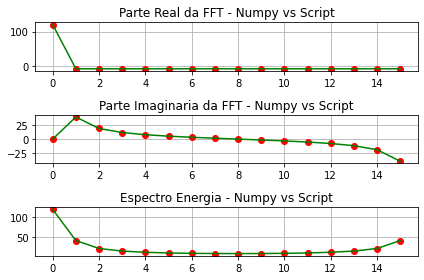

In [3]:
# Criando um sinal de entrada com 16 pontos
sinal = np.arange(16)
print(f'Sinal de entrada: \n{sinal}\n')

# Calculando a FFT do sinal - Script
fft = Fast_FT(sinal)
print(f'FFT do sinal - Função Criada: \n{fft}\n')

# Comparando o resultado com a dft - Numpy
fft_compara = np.fft.fft(sinal)
print(f'FFT do sinal - Integrada do Numpy: \n{fft_compara}\n')

# Plotando os resultados:
# Primeiro Plot
plt.subplot(3, 1, 1)
plt.title('Parte Real da FFT - Numpy vs Script')
plt.plot(fft.real, 'or')
plt.plot(fft_compara.real, 'g')
plt.grid(True)

# Segundo Plot
plt.subplot(3, 1, 2)
plt.title('Parte Imaginaria da FFT - Numpy vs Script')
plt.plot(fft.imag, 'or')
plt.plot(fft_compara.imag, 'g')
plt.grid(True)

# Terceiro Plot
plt.subplot(3, 1, 3)
plt.title('Espectro Energia - Numpy vs Script')
plt.plot(abs(fft), 'or')
plt.plot(abs(fft_compara), 'g')
plt.grid(True)

plt.tight_layout()
plt.show()


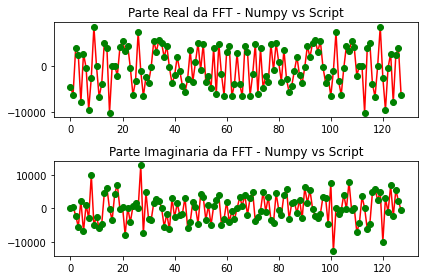

In [4]:
# Criando um sinal de entrada com 128 pontos de -1000 à 1000
sinal = np.random.randint(-1000, 1000, 128)

# Calculando a FFT do sinal - Script
fft = Fast_FT(sinal)

# Comparando o resultado com a dft - Numpy
fft_compara = np.fft.fft(sinal)

# Plotando os resultados:
# Primeiro Plot
plt.subplot(2, 1, 1)
plt.title('Parte Real da FFT - Numpy vs Script')
plt.plot(fft.real, 'r')
plt.plot(fft_compara.real, 'og')

# Segundo Plot
plt.subplot(2, 1, 2)
plt.title('Parte Imaginaria da FFT - Numpy vs Script')
plt.plot(fft.imag, 'r')
plt.plot(fft_compara.imag, 'og')

plt.tight_layout()
plt.show()


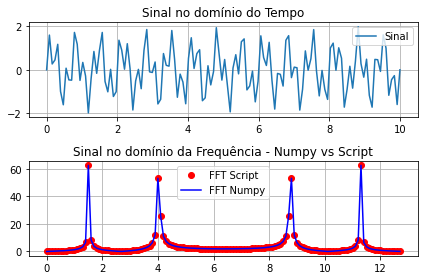

In [6]:
# Cria uma série temporal para o sinal
N = 128                              # Tamanho da amostragem
t = np.linspace(0, 10, N)            # Cria um array de 0 a 10 com 128 pontos
T = t[1]-t[0]                        # Período do sinal

# Cria um sinal senoidal
def f_sin(t):
    return np.sin(4*t*2*np.pi) + np.sin(1.5*t*2*np.pi)

signal = f_sin(t)                    # Cria o sinal
fft = Fast_FT(signal)                # Calcula a FFT do sinal (Script)
fft_compara = np.fft.fft(signal)     # Calcula a FFT do sinal (Numpy)
freq_scale = np.linspace(0,1/T, N)   # Cria um array no espaço da frequencia.

# Primeiro Plot
plt.subplot(2, 1, 1)
plt.title('Sinal no domínio do Tempo')
plt.plot(t, signal, label='Sinal')
plt.legend()
plt.grid(True)

# Segundo Plot
plt.subplot(2, 1, 2)
plt.title('Sinal no domínio da Frequência - Numpy vs Script')
plt.plot(freq_scale, abs(fft), 'ro', label='FFT Script')
plt.plot(freq_scale, abs(fft_compara), 'b', label='FFT Numpy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Referência Bibliográfica:**

[1] - **Introduction to computational Fourier analysis for engineers. Sampo, Laine**. Disponível em: <https://users.aalto.fi/~laines10/fourier.html>. Acessado em 21 de maio de 2022

[2] - **Transformada Discreta de Fourier - DFT. Saads, Leonardo**. Disponível em: <https://github.com/leonardoSaaads/ProcessamentoDigitalSinais/blob/main/Unidade%201/DFT.ipynb>. Acessado em 21 de maio de 2022